<p style="color:yellow;"><strong>This cell must be run first always to import necessary libraries and modules and set up the environment along with setting seed for reproducibility.</strong></p>


In [24]:
import numpy as np
np.random.seed(42)
from train_fashion_10 import train as fashion_train
from train_cifar_10 import train as cifar_train

The following 2 blocks allow for self training and is stated in each cell how long the training approximately takes. Further down there are cells made to test on the saved models which reproduce our finals results from the report.

--------------

# Fashion-MNIST Run

### Takes about 7 minutes to run on a standard laptop

```python

W&B disabled.
Epoch 5/100, Loss: 0.4124, Train Accuracy: 0.9196
Val Loss: 0.3834, Val Accuracy: 0.8652
Epoch 10/100, Loss: 0.3366, Train Accuracy: 0.9196
Val Loss: 0.3340, Val Accuracy: 0.8813
Epoch 15/100, Loss: 0.2971, Train Accuracy: 0.9375
Val Loss: 0.3264, Val Accuracy: 0.8893
Epoch 20/100, Loss: 0.2704, Train Accuracy: 0.9196
Val Loss: 0.3194, Val Accuracy: 0.8918
Epoch 25/100, Loss: 0.2479, Train Accuracy: 0.9375
Val Loss: 0.3102, Val Accuracy: 0.8963
Early stopping triggered at epoch 26. Best validation loss: 0.3081 (epoch 21)
Test accuracy: 0.8864


(<model_fashion_10.FashionFFNN at 0x7f3a37ef39e0>, np.float64(0.8864))

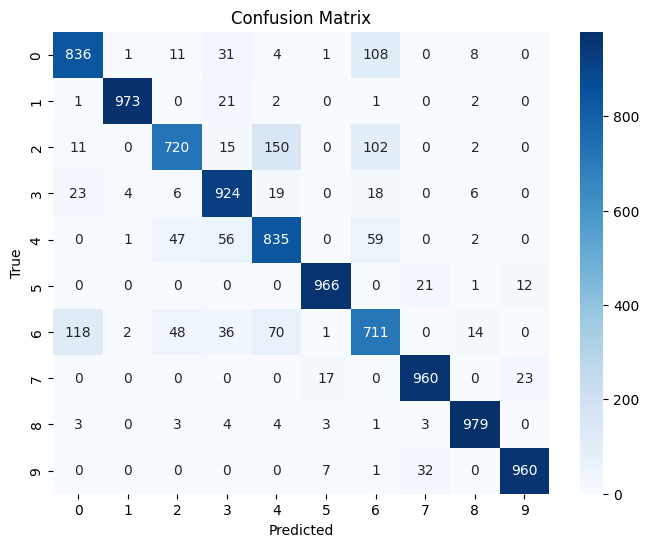

In [ ]:
from types import SimpleNamespace
import os
os.environ["WANDB_MODE"] = "disabled"
!wandb disabled

def train_notebook(config):
    """
    Notebook-friendly wrapper for training.
    `config` is a dictionary of parameters, similar to your params dict.
    """
    # Convert dict to a SimpleNamespace to mimic argparse.Namespace
    args = SimpleNamespace(**config)
    params['hidden_layers'] = ','.join(map(str, params['hidden_layers']))
#     # Convert hidden_layers from string to list if necessary
    if isinstance(args.hidden_layers, str):
        args.hidden_layers = [int(x.strip()) for x in args.hidden_layers.split(',')]
    
    return fashion_train(args=args)

params = {
        'num_epochs': 100,
        'dropout_rate': 0.3,
        'learning_rate': 0.0002028205158366963,
        'l2_coeff': 0.00004116389054464819,
        'hidden_layers': [1024, 512, 256],   # can be string or list
        'weight_init': 'xavier',
        'optimizer': 'adam',
        'activation': 'leaky_relu',
        'batch_size': 128,
        'input_size': 784,
        'loss': 'cross_entropy',
        'batch_norm': False,
        'standardize': False,
        'use_subset': False,
        'subset_ratio': 0.25,
        'project_name': 'Deep_learning_project',
        'experiment_name': 'Fashion_Notebook_Run',
        'no_wandb': False,
        'no_plots': False,
        'save_plots': 'Plots'
        }


train_notebook(params)

# Cifar-10 Run
### Takes about 19 minutes to run

W&B disabled.
Epoch 5/100, Loss: 2.4091, Train Accuracy: 0.8750
Val Loss: 2.2702, Val Accuracy: 0.4950
Epoch 10/100, Loss: 1.9286, Train Accuracy: 1.0000
Val Loss: 1.9250, Val Accuracy: 0.5308
Epoch 15/100, Loss: 1.7980, Train Accuracy: 0.8750
Val Loss: 1.8483, Val Accuracy: 0.5278
Epoch 20/100, Loss: 1.7472, Train Accuracy: 0.6250
Val Loss: 1.8305, Val Accuracy: 0.5366
Epoch 25/100, Loss: 1.7147, Train Accuracy: 0.8750
Val Loss: 1.8199, Val Accuracy: 0.5478
Epoch 30/100, Loss: 1.6985, Train Accuracy: 0.8750
Val Loss: 1.7934, Val Accuracy: 0.5612
Early stopping triggered at epoch 31. Best validation loss: 1.7827 (epoch 26)
Plot saved to: Plots/training_history_Cifar_notebook_Run.png


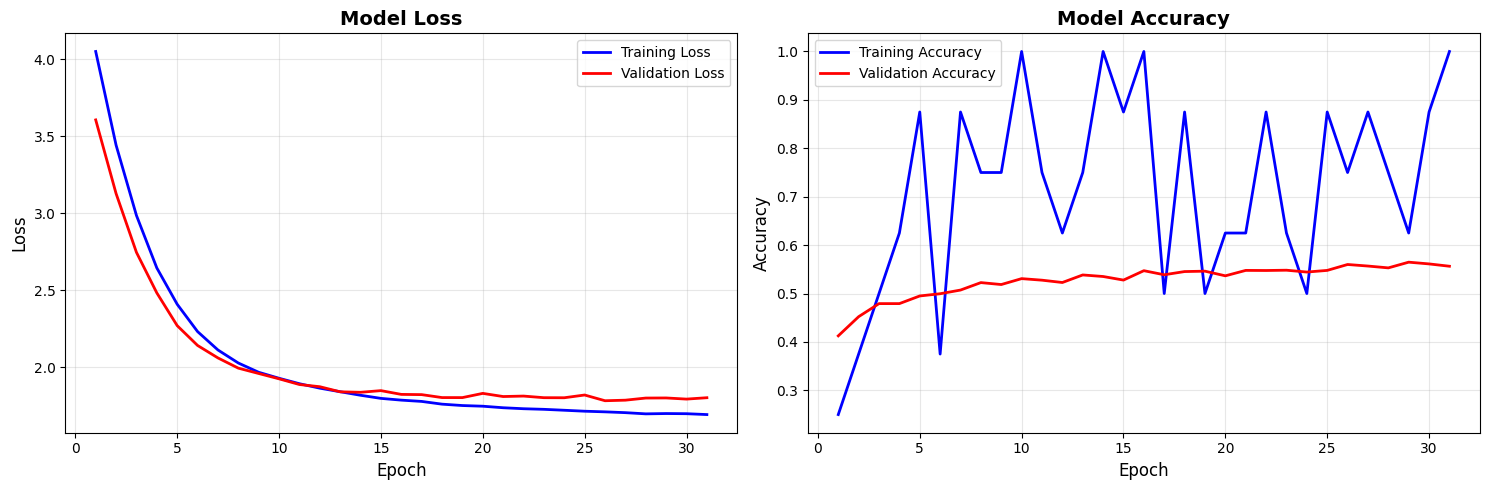

Test accuracy: 0.5546


(<model_cifar_10.FFNN at 0x7fe172d0b710>, np.float64(0.5546))

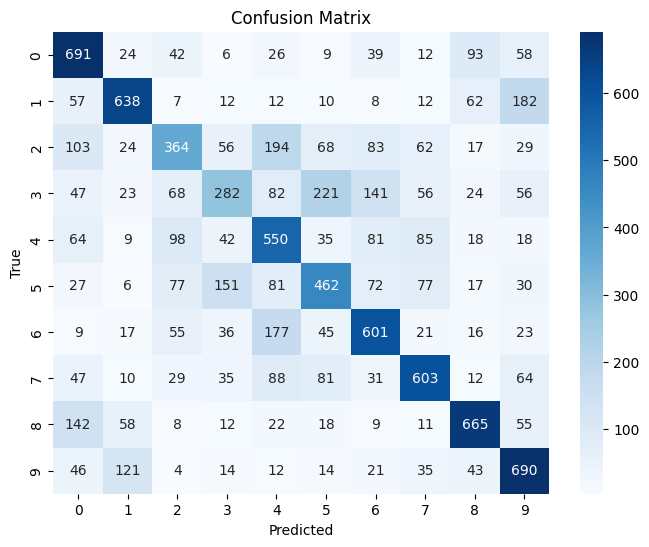

In [3]:
from types import SimpleNamespace
import os
os.environ["WANDB_MODE"] = "disabled"
!wandb disabled

def train_notebook(config):
    """
    Notebook-friendly wrapper for training.
    `config` is a dictionary of parameters, similar to your params dict.
    """
    # Convert dict to a SimpleNamespace to mimic argparse.Namespace
    args = SimpleNamespace(**config)
    params['hidden_layers'] = ','.join(map(str, params['hidden_layers']))
#     # Convert hidden_layers from string to list if necessary
    if isinstance(args.hidden_layers, str):
        args.hidden_layers = [int(x.strip()) for x in args.hidden_layers.split(',')]
    
    return cifar_train(args=args)

params = {
        'num_epochs': 100,
        'dropout_rate': 0.2,
        'learning_rate': 0.00030361363933609274,
        'l2_coeff': 0.0016688987469551863,
        'hidden_layers': [512, 256, 128],   # can be string or list
        'weight_init': 'xavier',
        'optimizer': 'adam',
        'activation': 'leaky_relu',
        'batch_size': 64,
        'input_size': 3072,
        'loss': 'cross_entropy',
        'batch_norm': False,
        'standardize': True,
        'use_subset': False,
        'subset_ratio': 0.25,
        'project_name': 'Deep_learning_project',
        'experiment_name': 'Cifar_notebook_Run',
        'no_wandb': False,
        'no_plots': False,
        'save_plots': 'Plots'
        }


train_notebook(params)

## FASHION-MNIST trained model

⚠️ **Note**: The save/load functionality was just added. If you get "no attribute load_model" error, it means:
1. The model was saved before the new functionality was added, OR
2. You need to train a new model with saving enabled

**Solutions**:
- Run the training cell above with `'save_model': True` added to params, OR
- Use the cells below to load an existing model and re-save it with the new format

Loaded with manual parameters

TEST RESULTS
Test Accuracy: 0.8932 (89.32%)
Test Loss: 0.5229
Evaluation time: 0.92 seconds
Total test samples: 10000

TEST RESULTS
Test Accuracy: 0.8932 (89.32%)
Test Loss: 0.5229
Evaluation time: 0.92 seconds
Total test samples: 10000


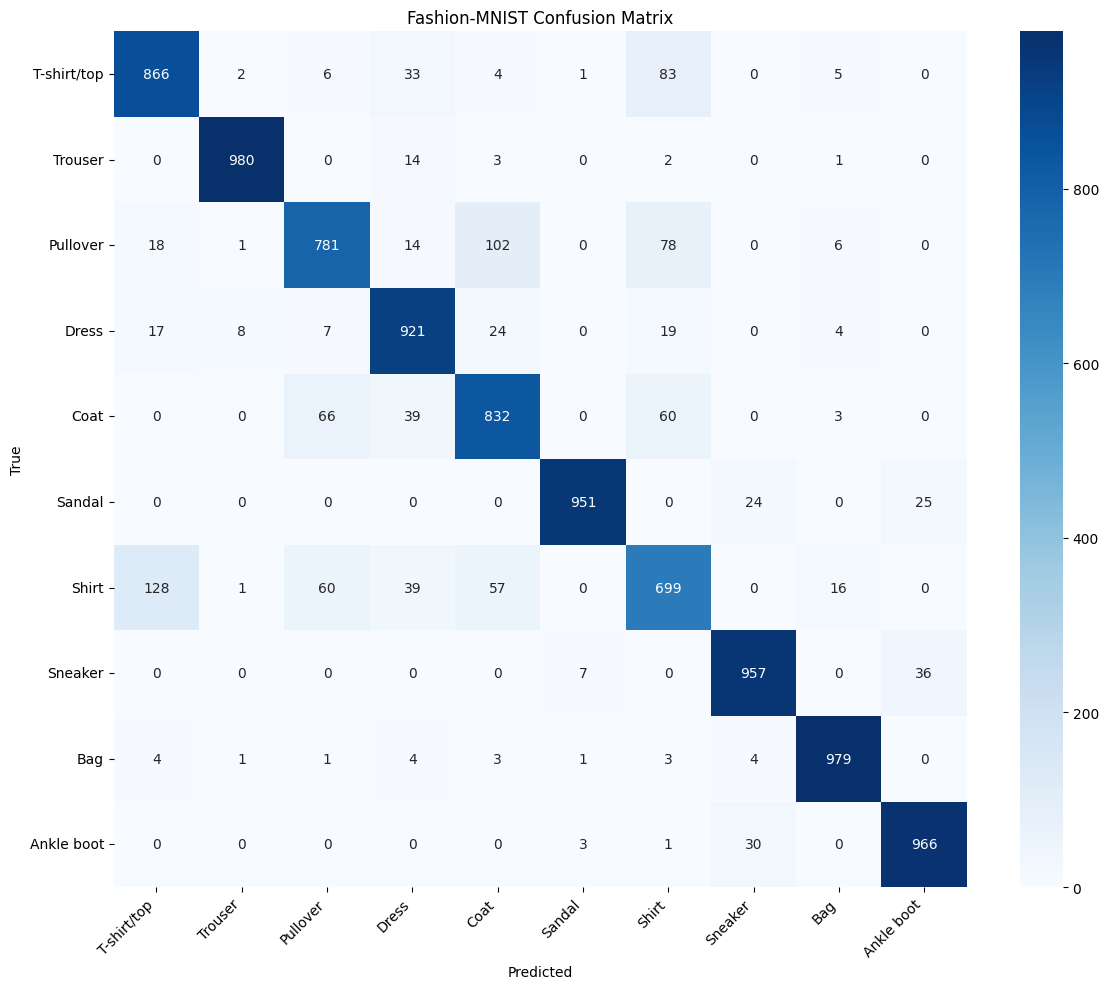

(np.float64(0.8932), np.float64(0.5228962611149701))

In [3]:
# Import and reload the updated model
np.random.seed(42)
import importlib
import model_cifar_10
importlib.reload(model_cifar_10)

from model_cifar_10 import FFNN
from types import SimpleNamespace
from test_fashion_10 import test_model as fashion_test
# Load the model directly
model = FFNN.load_model('../models/fashionmodel.pkl')
# print(f"Model loaded: {model.activation}, {model.hidden_layers}")

# Test on data
from load_data import DataLoaderFashionMNIST
dataloader = DataLoaderFashionMNIST()
(X_train, y_train), (X_val, y_val), (X_test, y_test) = dataloader.get_data()

fashion_test(args=SimpleNamespace(
    model_path='../models/fashionmodel.pkl',
    output_dir='test_results',
    batch_size=1000,
    standardize=False,
    confusion_matrix=True))

## 10 images from the test set with predicted and true labels

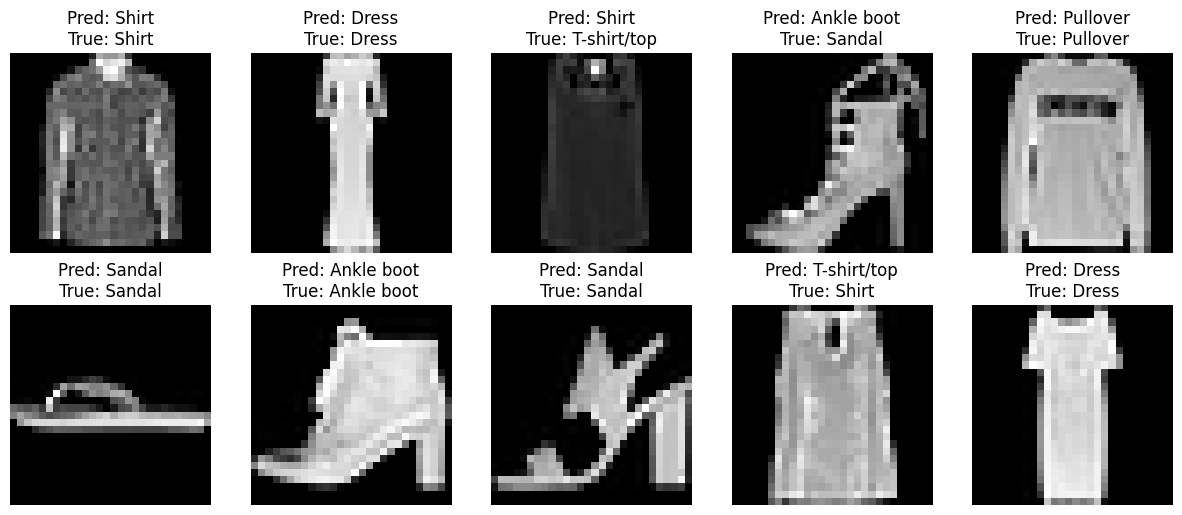

In [2]:
# Show predictions on 10 unique test images
import matplotlib.pyplot as plt
import numpy as np
from load_data import DataLoaderFashionMNIST
np.random.seed(42)

class_labels = DataLoaderFashionMNIST().get_class_names()
# Get 10 unique test images
unique_indices = np.random.choice(X_test.shape[0], 10, replace=False)
unique_images = X_test[unique_indices]
unique_labels = y_test[unique_indices]

# Make predictions
predictions = model.predict(unique_images)

# Plot the images and predictions using class labels
    
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(unique_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_labels[predictions[i]]}\nTrue: {class_labels[unique_labels[i]]}")
    plt.axis('off')
plt.show()